In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set()

In [4]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

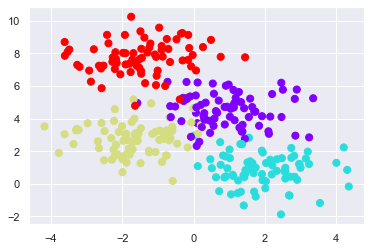

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow");

## Decision Trees
Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero in on the classification.

The binary splitting makes this extremely efficient: in a well-constructed tree, each
question will cut the number of options by approximately half, very quickly narrowing
the options even among a large number of classes.
In machine learning implementations of decision trees, the questions generally take the form of axis-aligned splits in the data; that is, each node in the tree splits the data into two groups using a cutoff value within one of the features

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X,y)

In [6]:
def visualize_classifier(model, X, y, ax=None, cmap="rainbow"):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,clim=(y.min(), y.max()), zorder=3)
    ax.axis("tight")
    ax.axis("off")
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
    np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
    levels=np.arange(n_classes + 1) - 0.5,
    cmap=cmap, clim=(y.min(), y.max()),
    zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

<ipython-input-7-9c1043e5380c>:18: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


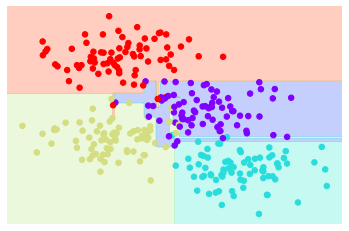

In [9]:
visualize_classifier(DecisionTreeClassifier(), X, y);

## Random Forest
This notion—that multiple overfitting estimators can be combined to reduce the
effect of this overfitting—is what underlies an ensemble method called bagging. Bagging
makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of
which overfits the data, and averages the results to find a better classification. An
ensemble of randomized decision trees is known as a random forest

In [1]:
# Doing this type of bagging classification manually using ssklearn bagging classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier 

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)


<ipython-input-6-9c1043e5380c>:18: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


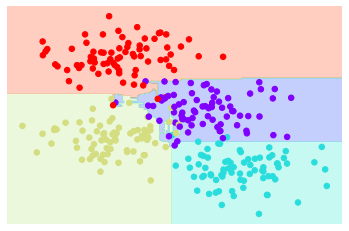

In [9]:
bag.fit(X, y)
visualize_classifier(bag, X, y)

<ipython-input-6-9c1043e5380c>:18: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


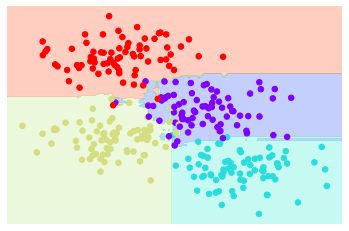

In [10]:
# RandomForestClassifier estimator, which takes care of all the randomization automatically
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

In [11]:
# Random Forest Regressor 
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise

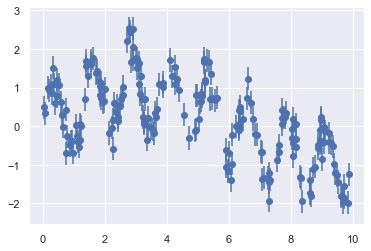

In [13]:
y = model(x)
plt.errorbar(x, y, 0.3, fmt="o");

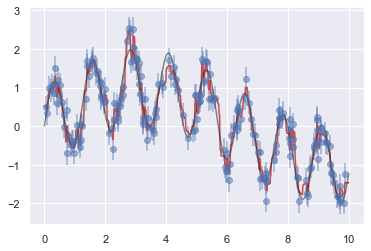

In [15]:
from sklearn.ensemble import RandomForestRegressor 
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

## Example: Random Forest for Classifying Digits

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

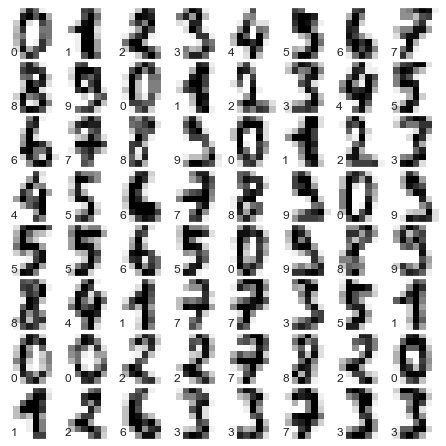

In [18]:
# set up the figure
fig = plt.figure(figsize=(6, 6)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
ypred = model.predict(X_test)

In [22]:
from sklearn import metrics
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



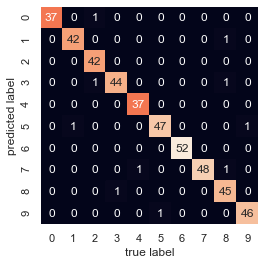

In [23]:
from sklearn.metrics import confusion_matrix 
mat = confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted label");